<a href="https://colab.research.google.com/github/Shatha-1/IT326-Project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Importing the dataset...
Dataset loaded successfully.

Step 2: Understanding the Dataset
Rows: 502, Columns: 11
Column names: ['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Data Types:
Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

Missing Values Before Handling:
Gender                                   0
A

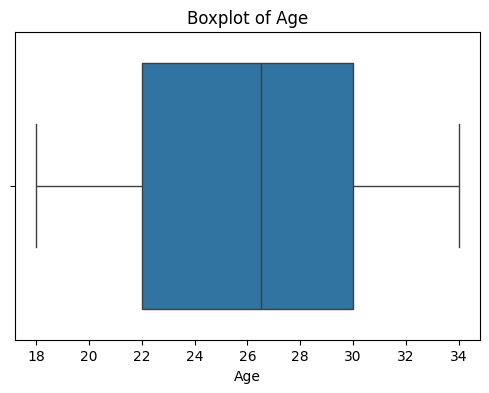

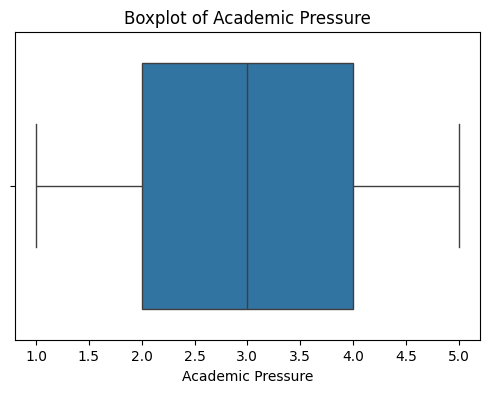

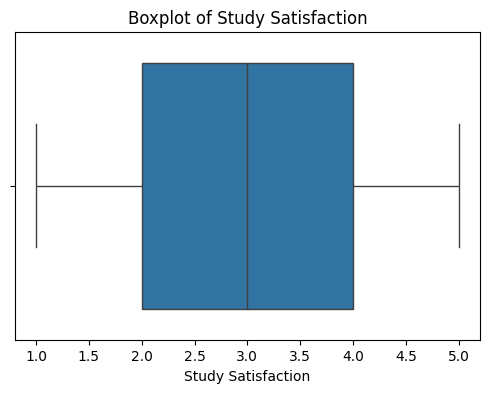

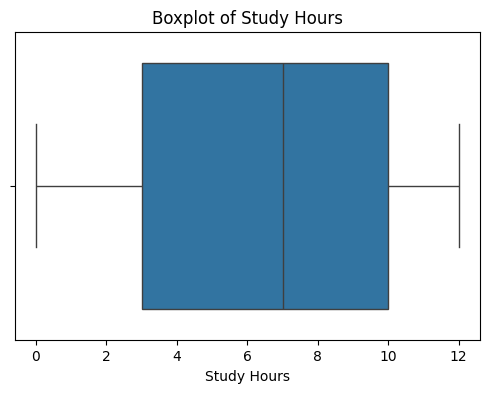

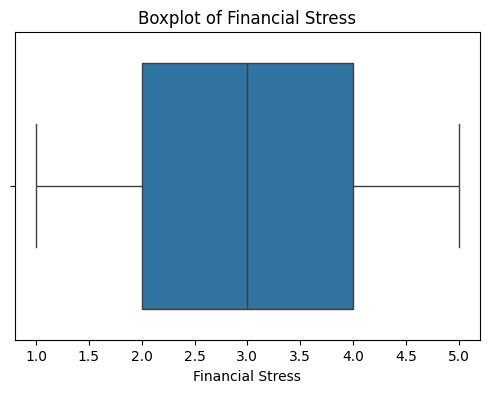


Detecting outliers using the IQR method:

Column: Age
  No outliers detected.

Column: Academic Pressure
  No outliers detected.

Column: Study Satisfaction
  No outliers detected.

Column: Study Hours
  No outliers detected.

Column: Financial Stress
  No outliers detected.


In [9]:
# Step 0: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
print("Step 1: Importing the dataset...")
dataset_path = "Depression Student Dataset.csv"

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None

df = load_dataset()

if df is not None:
    # Step 2: Dataset Overview
    print("\nStep 2: Understanding the Dataset")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("Column names:", df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values Before Handling:")
    print(df.isnull().sum())

    # Step 3: Numeric Analysis (Five-number summary, Boxplots, Outliers)
    print("\nStep 3: Numeric Analysis")
    print("Performing statistical analysis on numeric attributes to better understand their distribution.")

    # Identify numeric columns
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("Numeric features detected:", numeric_features)

    # ---- Five-number summary ----
    print("\nFive-number summary for each numeric feature:")
    five_num_summary = df[numeric_features].describe(percentiles=[0.25,0.5,0.75]).T[['min','25%','50%','75%','max']]
    print(five_num_summary)

    # ---- Boxplots ----
    print("\nGenerating boxplots for numeric features to visualize distributions and detect outliers.")
    for col in numeric_features:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()




    # ---- Outlier detection using IQR ----
    print("\nDetecting outliers using the IQR method:")
    outliers = {}
    for col in numeric_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers[col] = outlier_values
        print(f"\nColumn: {col}")
        if outlier_values.empty:
            print("  No outliers detected.")
        else:
            print(f"  Number of outliers: {len(outlier_values)}")
            print("  Example values:", outlier_values.head().tolist())
